In [37]:
import pandas as pd
from tqdm import tqdm
from matplotlib import pyplot as plt

In [38]:
df_dataset = pd.read_csv("workflows_dataset_rq3_complete.csv")

In [39]:
df_dataset

,repository,workflow_file,workflow_content_file,branch,language,created,updated,commits,branches,releases,...,triggers,runners,actions_used,workflow_type,actionlint_result_gold,generated_prompt,generated_workflow_2.5_pro,generated_workflow_2.5_flash,actionlint_result_generated_workflow_2.5_pro,actionlint_result_generated_workflow_2.5_flash
0,0xax/linux-insides,check-code-snippets.yaml,name: check code snippets\n\non:\n workflow_d...,master,Python,2015-01-03 06:44:57,2025-08-09 08:57:12,1932,1,0,...,NaN,[['ubuntu-22.04']],"['actions/checkout@v6', 'actions/setup-python@...",other,"{""exit_code"": 0, ""diagnostics"": [], ""raw_outpu...",I need a GitHub Actions workflow to validate c...,name: Validate Code Snippets\n\non:\n push:\n...,name: Validate Code Snippets\n\non:\n push:\n...,"{""exit_code"": 0, ""diagnostics"": [], ""raw_outpu...","{""exit_code"": 0, ""diagnostics"": [], ""raw_outpu..."
1,0xax/linux-insides,generate-e-books.yaml,name: Generate e-books\n\non:\n pull_request:...,master,Python,2015-01-03 06:44:57,2025-08-09 08:57:12,1932,1,0,...,NaN,['ubuntu-latest'],"['actions/checkout@v6', 'actions/upload-artifa...",other,"{""exit_code"": 0, ""diagnostics"": [], ""raw_outpu...",I need a GitHub Actions workflow to automatica...,name: Generate E-books\n\non:\n pull_request:...,name: Generate E-books\n\non:\n pull_request:...,"{""exit_code"": 0, ""diagnostics"": [], ""raw_outpu...","{""exit_code"": 0, ""diagnostics"": [], ""raw_outpu..."
2,0xax/linux-insides,release-e-books.yaml,name: Release e-books\n\non:\n push:\n tag...,master,Python,2015-01-03 06:44:57,2025-08-09 08:57:12,1932,1,0,...,NaN,['ubuntu-latest'],"['actions/checkout@v6', 'softprops/action-gh-r...",deploy,"{""exit_code"": 0, ""diagnostics"": [], ""raw_outpu...",I need a GitHub Actions workflow to automatica...,name: Create Release\n\non:\n push:\n tags...,name: Create Release\n\non:\n push:\n tags...,"{""exit_code"": 0, ""diagnostics"": [], ""raw_outpu...","{""exit_code"": 1, ""diagnostics"": [{""message"": ""..."
3,1panel-dev/1panel,add-labels-for-pr.yml,\nname: General PR Handling for 1Panel\non: pu...,dev-v2,Go,2022-07-19 03:44:52,2025-08-22 02:37:52,3890,20,96,...,NaN,['ubuntu-latest'],"['actions/checkout@v3', 'actions-ecosystem/act...",other,"{""exit_code"": 1, ""diagnostics"": [{""message"": ""...",I need a GitHub Actions workflow that automati...,name: Add Base Branch Label\non:\n pull_reque...,name: Add Base Branch Label\n\non:\n pull_req...,"{""exit_code"": 0, ""diagnostics"": [], ""raw_outpu...","{""exit_code"": 0, ""diagnostics"": [], ""raw_outpu..."
4,1panel-dev/1panel,build-publish-to-oss.yml,name: Create Release And Upload assets\non:\n ...,dev-v2,Go,2022-07-19 03:44:52,2025-08-22 02:37:52,3890,20,96,...,NaN,['ubuntu-latest'],"['actions/checkout@v4', 'actions/setup-node@v4...",build,"{""exit_code"": 1, ""diagnostics"": [{""message"": ""...",I need a GitHub Actions workflow that creates ...,name: Create Release and Upload Assets\n\non:\...,name: Release\n\non:\n push:\n tags:\n ...,"{""exit_code"": 0, ""diagnostics"": [], ""raw_outpu...","{""exit_code"": 0, ""diagnostics"": [], ""raw_outpu..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3883,zsh-users/zsh-autosuggestions,integration.yml,"on: [push, pull_request]\nconcurrency:\n grou...",master,Shell,2013-10-26 04:09:37,2025-06-24 04:15:03,562,14,0,...,NaN,"['ubuntu-22.04', 'ubuntu-22.04']","['actions/checkout@v3', 'actions/checkout@v3',...",other,"{""exit_code"": 1, ""diagnostics"": [{""message"": ""...",I need a GitHub Actions workflow that runs on ...,name: CI\n\non:\n push:\n pull_request:\n\nc...,name: Zsh Autosuggestions Tests\n\non:\n push...,"{""exit_code"": 0, ""diagnostics"": [], ""raw_outpu...","{""exit_code"": 0, ""diagnostics"": [], ""raw_outpu..."
3884,zxing/zxing,codeql-analysis.yml,"# For most projects, this workflow file will n...",master,Java,2011-10-12 02:07:27,2025-08-11 01:24:00,3826,5,31,...,NaN,['ubuntu-latest'],"['actions/checkout@v5'

In [40]:
df_dataset.columns
# df_dataset_filtered = df_dataset

Index(['repository', 'workflow_file', 'workflow_content_file', 'branch',
       'language', 'created', 'updated', 'commits', 'branches', 'releases',
       'contributors', 'stars', 'issues', 'pullrequests', 'codelines', 'size',
       'commit_hash', 'author_name', 'author_email', 'committer_name',
       'committer_email', 'committed_date', 'authored_date', 'file_path',
       'previous_file_path', 'file_hash', 'previous_file_hash',
       'git_change_type', 'valid_yaml', 'probably_workflow', 'valid_workflow',
       'uid', 'workflow_content_meta', 'triggers', 'runners', 'actions_used',
       'workflow_type', 'actionlint_result_gold', 'generated_prompt',
       'generated_workflow_2.5_pro', 'generated_workflow_2.5_flash',
       'actionlint_result_generated_workflow_2.5_pro',
       'actionlint_result_generated_workflow_2.5_flash'],
      dtype='object')

In [41]:
# df_dataset_filtered.drop(columns=['branch', 'language', 'created', 'updated', 'branches', 'releases',
       # 'contributors', 'stars', 'issues', 'pullrequests', 'codelines', 'size'], inplace=True)

### RQ2 Analysis

In [42]:
df_dataset_filtered

NameError: name 'df_dataset_filtered' is not defined

## TABLE B

In [44]:
import json
import pandas as pd
import numpy as np

CONDITIONS = {
    "gold":  "actionlint_result_gold",
    "pro":   "actionlint_result_generated_workflow_2.5_pro",
    "flash": "actionlint_result_generated_workflow_2.5_flash",
}

def parse_actionlint(cell):
    if cell is None or (isinstance(cell, float) and np.isnan(cell)):
        return None

    if isinstance(cell, str):
        try:
            cell = json.loads(cell)
        except Exception:
            return None

    if isinstance(cell, dict):
        return cell

    return None

rows = []

for _, row in df_dataset.iterrows():
    for condition, col in CONDITIONS.items():
        result = parse_actionlint(row[col])
        if result is None:
            continue

        diagnostics = result.get("diagnostics", [])
        exit_code = result.get("exit_code", None)

        # IMPORTANT: include workflows with ZERO diagnostics later
        for d in diagnostics:
            rows.append({
                "workflow_id": row["uid"],
                "condition": condition,
                "repository": row["repository"],
                "workflow_file": row["workflow_file"],
                "file_path": row["file_path"],
                "workflow_type": row["workflow_type"],
                "language": row["language"],

                # actionlint diagnostic fields
                "level": "error",               # actionlint diagnostics are errors
                "kind": d.get("kind"),          # <-- taxonomy signal
                "message": d.get("message"),
                "line": d.get("line"),
                "column": d.get("column"),
                "end_column": d.get("end_column"),
                "snippet": d.get("snippet"),
                "exit_code": exit_code,
            })

diag_df = pd.DataFrame(rows)


In [45]:
diag_df.head()
# diag_df.condition.value_counts()
# diag_df.kind.value_counts()
# diag_df.groupby("condition").size()


,workflow_id,condition,repository,workflow_file,file_path,workflow_type,language,level,kind,message,line,column,end_column,snippet,exit_code
0,0xax/linux-insides/.github/workflows/check-cod...,flash,0xax/linux-insides,release-e-books.yaml,.github/workflows/release-e-books.yaml,deploy,Python,error,expression,"property ""sha_short"" is not defined in object ...",37,149,149,run: |,1
1,1panel-dev/1panel/.github/workflows/release-dr...,gold,1panel-dev/1panel,add-labels-for-pr.yml,.github/workflows/add-labels-for-pr.yml,other,Go,error,action,"the runner of ""actions/checkout@v3"" action is ...",11,15,33,- uses: actions/checkout@v3\n ...,1
2,1panel-dev/1panel/.github/workflows/release-dr...,gold,1panel-dev/1panel,build-publish-to-oss.yml,.github/workflows/build-publish-to-oss.yml,build,Go,error,action,"the runner of ""softprops/action-gh-release@v1""...",32,15,44,uses: softprops/action-gh-release@v1\n...,1
3,1panel-dev/1panel/.github/workflows/release-dr...,gold,1panel-dev/1panel,build-publish-to-r2.yml,.github/workflows/build-publish-to-r2.yml,build,Go,error,action,"the runner of ""softprops/action-gh-release@v1""...",32,15,44,uses: softprops/action-gh-release@v1\n...,1
4,1panel-dev/1panel/.github/workflows/release-dr...,gold,1panel-dev/1panel,sonarcloud-scan.yml,.github/workflows/sonarcloud-scan.yml,other,Go,error,action,"the runner of ""actions/checkout@v3"" action is ...",13,15,33,- uses: actions/checkout@v3\n ...,1


In [46]:
df_dataset["actionlint_result_gold"].iloc[4]

'{"exit_code": 1, "diagnostics": [{"message": "the runner of \\"softprops/action-gh-release@v1\\" action is too old to run on GitHub Actions. update the action\'s version to fix this issue", "filepath": "..\\\\..\\\\..\\\\..\\\\..\\\\..\\\\..\\\\..\\\\..\\\\AppData\\\\Local\\\\Temp\\\\tmp7_qb7bss.yml", "line": 32, "column": 15, "kind": "action", "snippet": "        uses: softprops/action-gh-release@v1\\n              ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~", "end_column": 44}], "raw_output": null, "stderr": ""}'

## TABLE A

In [47]:
# Start from diag_df (diagnostic-level)

# Aggregate diagnostics per workflow per condition
table_a = (
    diag_df
    .groupby(["workflow_id", "condition"])
    .agg(
        n_errors=("level", "count"),        # all diagnostics are errors
        n_kinds=("kind", "nunique")
    )
    .reset_index()
)

# Mark pass/fail
table_a["passes_actionlint"] = table_a["n_errors"] == 0

# ---- IMPORTANT ----
# Add workflows with ZERO diagnostics (true passes)
all_workflows = (
    df_dataset[["uid"]]
    .drop_duplicates()
    .rename(columns={"uid": "workflow_id"})
)

conditions = ["gold", "pro", "flash"]

full_index = (
    all_workflows
    .assign(key=1)
    .merge(
        pd.DataFrame({"condition": conditions, "key": 1}),
        on="key"
    )
    .drop("key", axis=1)
)

table_a = (
    full_index
    .merge(table_a, on=["workflow_id", "condition"], how="left")
    .fillna({
        "n_errors": 0,
        "n_kinds": 0,
        "passes_actionlint": True
    })
)


In [48]:
table_a.head()
# table_a.condition.value_counts()
# table_a.groupby("condition")["passes_actionlint"].mean()
# table_a.groupby("condition")["n_errors"].median()



,workflow_id,condition,n_errors,n_kinds,passes_actionlint
0,0xax/linux-insides/.github/workflows/check-cod...,gold,0.0,0.0,True
1,0xax/linux-insides/.github/workflows/check-cod...,pro,0.0,0.0,True
2,0xax/linux-insides/.github/workflows/check-cod...,flash,1.0,1.0,False
3,1panel-dev/1panel/.github/workflows/release-dr...,gold,5.0,1.0,False
4,1panel-dev/1panel/.github/workflows/release-dr...,pro,0.0,0.0,True


## Stats Tests

### McNemar (Pass/Fail)

In [49]:
from statsmodels.stats.contingency_tables import mcnemar

def mcnemar_test(df, cond_a, cond_b):
    pivot = (
        df
        .pivot(index="workflow_id", columns="condition", values="passes_actionlint")
        [[cond_a, cond_b]]
        .dropna()
    )

    table = [[0, 0], [0, 0]]
    for a, b in pivot.itertuples(index=False):
        table[int(a)][int(b)] += 1

    return mcnemar(table, exact=True)

mcnemar_gold_pro   = mcnemar_test(table_a, "gold", "pro")
mcnemar_gold_flash = mcnemar_test(table_a, "gold", "flash")
mcnemar_pro_flash  = mcnemar_test(table_a, "pro", "flash")

mcnemar_gold_pro, mcnemar_gold_flash, mcnemar_pro_flash


(<bunch containing results, print to see contents>,
 <bunch containing results, print to see contents>,
 <bunch containing results, print to see contents>)

In [50]:
print(mcnemar_gold_pro)
print('\n')
print(mcnemar_gold_flash)
print('\n')
print(mcnemar_pro_flash)

pvalue      0.17677965404809917
statistic   89.0


pvalue      0.04985144161687206
statistic   81.0


pvalue      7.25436661612308e-07
statistic   23.0


### Wilcoxon (Error Counts)

In [51]:
from scipy.stats import wilcoxon

pivot_errors = (
    table_a
    .pivot(index="workflow_id", columns="condition", values="n_errors")
)

wilcoxon_gold_pro   = wilcoxon(pivot_errors["gold"], pivot_errors["pro"])
wilcoxon_gold_flash = wilcoxon(pivot_errors["gold"], pivot_errors["flash"])
wilcoxon_pro_flash  = wilcoxon(pivot_errors["pro"], pivot_errors["flash"])

wilcoxon_gold_pro, wilcoxon_gold_flash, wilcoxon_pro_flash


(WilcoxonResult(statistic=25161.0, pvalue=1.1479603291744413e-05),
 WilcoxonResult(statistic=37226.0, pvalue=0.40697877863258103),
 WilcoxonResult(statistic=11359.5, pvalue=3.332112993078308e-18))

### Bucket Level Prevalence

In [52]:
KIND_TO_BUCKET = {
    "action": "Actions & Runners",
    "runner-label": "Actions & Runners",

    "expression": "Expressions & Conditions",
    "if-cond": "Expressions & Conditions",

    "syntax-check": "Syntax & Structure",
    "id": "Syntax & Structure",

    "events": "Workflow Triggers",

    "shell-name": "Shell / Execution",

    "permissions": "Permissions & Security",
    "deprecated-commands": "Permissions & Security",
}

diag_df["bucket"] = diag_df["kind"].map(KIND_TO_BUCKET).fillna("Other")


In [53]:
diag_df.bucket.value_counts()


Actions & Runners           4409
Expressions & Conditions    1374
Syntax & Structure          1121
Workflow Triggers            231
Permissions & Security       157
Shell / Execution             68
Other                         56
Name: bucket, dtype: int64

In [54]:
bucket_presence = (
    diag_df
    .groupby(["workflow_id", "condition", "bucket"])
    .size()
    .reset_index(name="count")
)

bucket_presence["has_bucket_error"] = True


In [55]:
all_buckets = bucket_presence["bucket"].unique()

full_bucket = (
    table_a[["workflow_id", "condition"]]
    .assign(key=1)
    .merge(
        pd.DataFrame({"bucket": all_buckets, "key": 1}),
        on="key"
    )
    .drop("key", axis=1)
)

bucket_presence = (
    full_bucket
    .merge(
        bucket_presence[["workflow_id", "condition", "bucket", "has_bucket_error"]],
        on=["workflow_id", "condition", "bucket"],
        how="left"
    )
    .fillna({"has_bucket_error": False})
)


In [56]:
bucket_summary = (
    bucket_presence
    .groupby(["condition", "bucket"])["has_bucket_error"]
    .mean()
    .reset_index()
)


In [57]:
diag_df.bucket.value_counts()


Actions & Runners           4409
Expressions & Conditions    1374
Syntax & Structure          1121
Workflow Triggers            231
Permissions & Security       157
Shell / Execution             68
Other                         56
Name: bucket, dtype: int64

In [58]:
table_a

,workflow_id,condition,n_errors,n_kinds,passes_actionlint
0,0xax/linux-insides/.github/workflows/check-cod...,gold,0.0,0.0,True
1,0xax/linux-insides/.github/workflows/check-cod...,pro,0.0,0.0,True
2,0xax/linux-insides/.github/workflows/check-cod...,flash,1.0,1.0,False
3,1panel-dev/1panel/.github/workflows/release-dr...,gold,5.0,1.0,False
4,1panel-dev/1panel/.github/workflows/release-dr...,pro,0.0,0.0,True
...,...,...,...,...,...
1513,zsh-users/zsh-autosuggestions/.github/workflow...,pro,0.0,0.0,True
1514,zsh-users/zsh-autosuggestions/.github/workflow...,flash,0.0,0.0,True
1515,zxing/zxing/.github/workflows/test_java_21.yml...,gold,0.0,0.0,True
1516,zxing/zxing/.github/workflows/test_java_21.yml...,pro,0.0,0.0,True


## after cleaning

Deduplicating by uid
Excluding rows where:
valid_yaml == False
probably_workflow == False
valid_workflow == False
Collapsing multiple commits / file versions into one workflow

### Plots

In [59]:
table_a.to_csv("./Plots/table_a_rq2.csv", index=False)

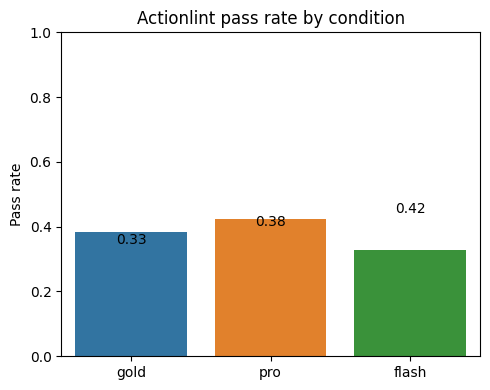

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

pass_rate = (
    table_a
    .groupby("condition")["passes_actionlint"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(5,4))
sns.barplot(
    data=pass_rate,
    x="condition",
    y="passes_actionlint",
    order=["gold", "pro", "flash"]
)
plt.ylabel("Pass rate")
plt.xlabel("")
plt.ylim(0, 1)
plt.title("Actionlint pass rate by condition")

for i, row in pass_rate.iterrows():
    plt.text(i, row.passes_actionlint + 0.02,
             f"{row.passes_actionlint:.2f}",
             ha="center")

plt.tight_layout()
plt.show()


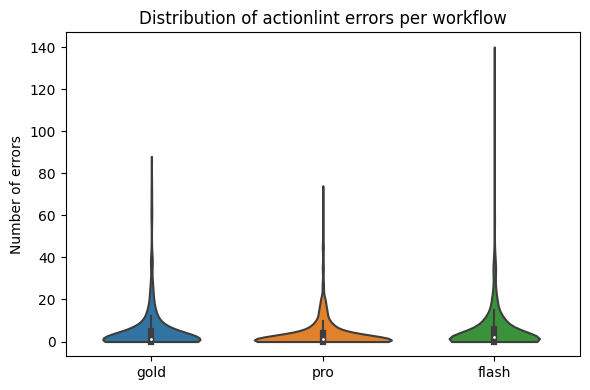

In [61]:
plt.figure(figsize=(6,4))
sns.violinplot(
    data=table_a,
    x="condition",
    y="n_errors",
    order=["gold", "pro", "flash"],
    cut=0
)
plt.ylabel("Number of errors")
plt.xlabel("")
plt.title("Distribution of actionlint errors per workflow")
plt.tight_layout()
plt.show()


In [62]:
bucket_summary.to_csv("./Plots/bucket_summary_rq2.csv", index=False)

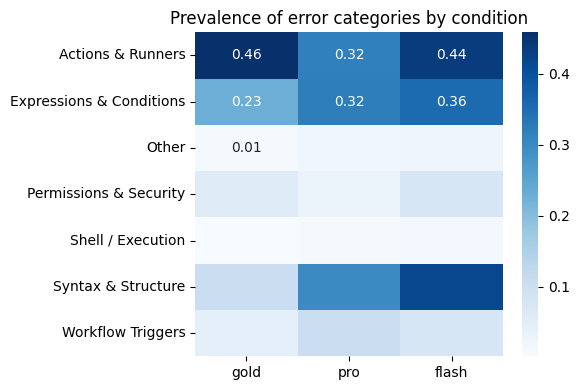

In [63]:
bucket_pivot = bucket_summary.pivot(
    index="bucket",
    columns="condition",
    values="has_bucket_error"
).loc[:, ["gold", "pro", "flash"]]

plt.figure(figsize=(6,4))
sns.heatmap(
    bucket_pivot,
    annot=True,
    fmt=".2f",
    cmap="Blues"
)
plt.title("Prevalence of error categories by condition")
plt.ylabel("")
plt.xlabel("")
plt.tight_layout()
plt.show()


In [64]:
diag_df.to_csv("./Plots/diag_df_rq2.csv", index=False)

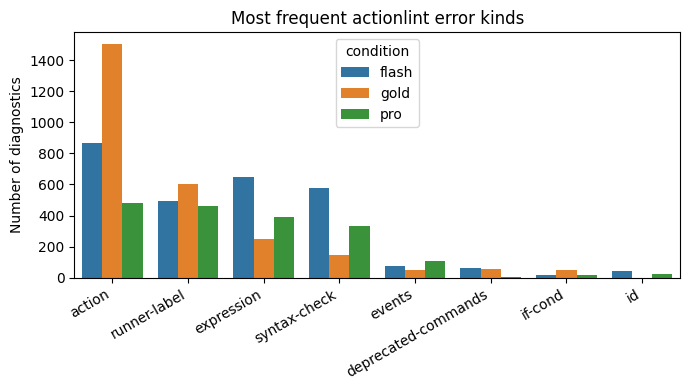

In [65]:
top_kinds = (
    diag_df
    .groupby(["condition", "kind"])
    .size()
    .reset_index(name="count")
)

top_kinds = (
    top_kinds
    .groupby("kind")["count"]
    .sum()
    .sort_values(ascending=False)
    .head(8)
    .index
)

plot_df = (
    diag_df[diag_df.kind.isin(top_kinds)]
    .groupby(["condition", "kind"])
    .size()
    .reset_index(name="count")
)

plt.figure(figsize=(7,4))
sns.barplot(
    data=plot_df,
    x="kind",
    y="count",
    hue="condition",
    order=top_kinds
)
plt.xticks(rotation=30, ha="right")
plt.ylabel("Number of diagnostics")
plt.xlabel("")
plt.title("Most frequent actionlint error kinds")
plt.tight_layout()
plt.show()


In [67]:
print(plot_df)

   condition                 kind  count
0      flash               action    867
1      flash  deprecated-commands     62
2      flash               events     74
3      flash           expression    645
4      flash                   id     44
5      flash              if-cond     21
6      flash         runner-label    493
7      flash         syntax-check    575
8       gold               action   1503
9       gold  deprecated-commands     55
10      gold               events     52
11      gold           expression    249
12      gold              if-cond     50
13      gold         runner-label    600
14      gold         syntax-check    145
15       pro               action    482
16       pro  deprecated-commands      6
17       pro               events    105
18       pro           expression    393
19       pro                   id     27
20       pro              if-cond     16
21       pro         runner-label    464
22       pro         syntax-check    330


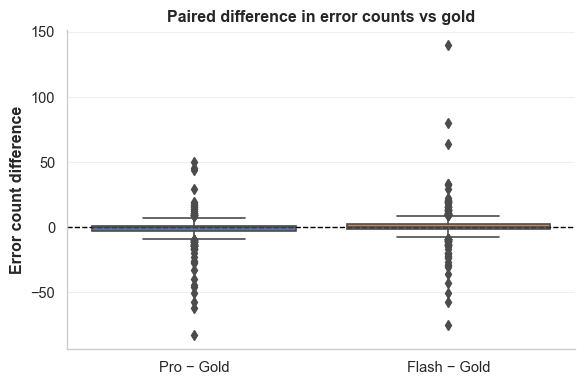

In [83]:
pivot_errors = table_a.pivot(
    index="workflow_id",
    columns="condition",
    values="n_errors"
)

delta_df = pd.DataFrame({
    "Pro − Gold": pivot_errors["pro"] - pivot_errors["gold"],
    "Flash − Gold": pivot_errors["flash"] - pivot_errors["gold"],
})

plt.figure(figsize=(6,4))
sns.boxplot(data=delta_df)
plt.axhline(0, color="black", linestyle="--", linewidth=1)
plt.ylabel("Error count difference")
plt.title("Paired difference in error counts vs gold")
plt.tight_layout()
plt.show()


Nicer looking plots

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(
    style="whitegrid",
    context="paper",
    font_scale=1.2,
)

plt.rcParams.update({
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.labelweight": "bold",
    "axes.titleweight": "bold",
    "axes.grid": True,
    "grid.alpha": 0.3,
})


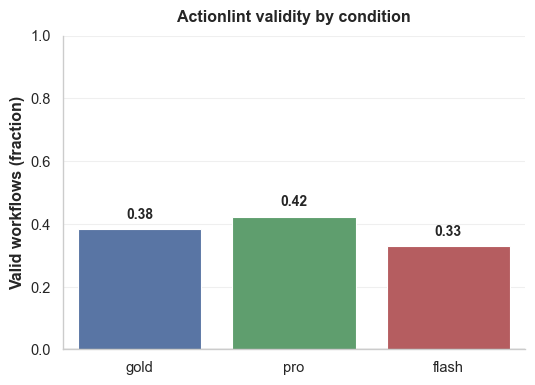

In [84]:
import numpy as np

order = ["gold", "pro", "flash"]
palette = {
    "gold":  "#4C72B0",   # muted blue
    "pro":   "#55A868",   # muted green
    "flash": "#C44E52",   # muted red
}

pass_rate = (
    table_a
    .groupby("condition")["passes_actionlint"]
    .mean()
    .reindex(order)
    .reset_index()
)

fig, ax = plt.subplots(figsize=(5.5, 4))

sns.barplot(
    data=pass_rate,
    x="condition",
    y="passes_actionlint",
    order=order,
    palette=palette,
    ax=ax
)

# Y-axis formatting
ax.set_ylim(0, 1)
ax.set_ylabel("Valid workflows (fraction)")
ax.set_xlabel("")
ax.set_title("Actionlint validity by condition", pad=10)

# Annotate bars
for i, row in pass_rate.iterrows():
    ax.text(
        i,
        row.passes_actionlint + 0.025,
        f"{row.passes_actionlint:.2f}",
        ha="center",
        va="bottom",
        fontsize=10,
        fontweight="bold"
    )

# Subtle baseline
ax.axhline(0, color="black", linewidth=0.8)

plt.tight_layout()
plt.show()


In [3]:
import pandas as pd

# Load RQ2 results
df = pd.read_csv("./Plots/table_a_rq2.csv")

# Sanity check expected columns
required_cols = {"condition", "passes_actionlint"}
assert required_cols.issubset(df.columns), df.columns

# Compute pass counts and rates
pass_table = (
    df
    .groupby("condition")
    .agg(
        n_total=("passes_actionlint", "size"),
        n_pass=("passes_actionlint", "sum"),
    )
    .reset_index()
)

pass_table["pass_rate"] = pass_table["n_pass"] / pass_table["n_total"]

print(pass_table)


  condition  n_total  n_pass  pass_rate
0     flash      506     166   0.328063
1      gold      506     194   0.383399
2       pro      506     214   0.422925


In [4]:
from statsmodels.stats.proportion import proportion_confint

def wilson_ci(row, alpha=0.05):
    low, high = proportion_confint(
        count=row["n_pass"],
        nobs=row["n_total"],
        alpha=alpha,
        method="wilson"
    )
    return pd.Series({"ci_low": low, "ci_high": high})

ci = pass_table.apply(wilson_ci, axis=1)
pass_table = pd.concat([pass_table, ci], axis=1)

print(pass_table)


  condition  n_total  n_pass  pass_rate    ci_low   ci_high
0     flash      506     166   0.328063  0.288584  0.370134
1      gold      506     194   0.383399  0.342064  0.426491
2       pro      506     214   0.422925  0.380619  0.466392


In [5]:
# Should all be 506
print(pass_table["n_total"])

# Rates should match your plots
print(pass_table[["condition", "pass_rate"]])


0    506
1    506
2    506
Name: n_total, dtype: int64
  condition  pass_rate
0     flash   0.328063
1      gold   0.383399
2       pro   0.422925


In [7]:
import pandas as pd
from statsmodels.stats.contingency_tables import mcnemar

df = pd.read_csv("./Plots/table_a_rq2.csv")

# Pivot to get paired pass/fail
pivot = df.pivot(index="workflow_id", columns="condition", values="passes_actionlint")

def run_mcnemar(a, b):
    table = [
        [((a == 1) & (b == 1)).sum(), ((a == 1) & (b == 0)).sum()],
        [((a == 0) & (b == 1)).sum(), ((a == 0) & (b == 0)).sum()],
    ]
    result = mcnemar(table, exact=False, correction=True)
    return result.statistic, result.pvalue

stat_pro, p_pro = run_mcnemar(pivot["gold"], pivot["pro"])
stat_flash, p_flash = run_mcnemar(pivot["gold"], pivot["flash"])

print("Gold vs Pro:", stat_pro, p_pro)
print("Gold vs Flash:", stat_flash, p_flash)


Gold vs Pro: 1.8232323232323233 0.17692900573221476
Gold vs Flash: 3.836842105263158 0.05013786843343209


Diagnostics

In [11]:
diag_df = pd.read_csv("./Plots/diag_df_rq2.csv")
diag_df

,workflow_id,condition,repository,workflow_file,file_path,workflow_type,language,level,kind,message,line,column,end_column,snippet,exit_code,bucket
0,0xax/linux-insides/.github/workflows/check-cod...,flash,0xax/linux-insides,release-e-books.yaml,.github/workflows/release-e-books.yaml,deploy,Python,error,expression,"property ""sha_short"" is not defined in object ...",37,149,149,run: |,1,Expressions & Conditions
1,1panel-dev/1panel/.github/workflows/release-dr...,gold,1panel-dev/1panel,add-labels-for-pr.yml,.github/workflows/add-labels-for-pr.yml,other,Go,error,action,"the runner of ""actions/checkout@v3"" action is ...",11,15,33,- uses: actions/checkout@v3\n ...,1,Actions & Runners
2,1panel-dev/1panel/.github/workflows/release-dr...,gold,1panel-dev/1panel,build-publish-to-oss.yml,.github/workflows/build-publish-to-oss.yml,build,Go,error,action,"the runner of ""softprops/action-gh-release@v1""...",32,15,44,uses: softprops/action-gh-release@v1\n...,1,Actions & Runners
3,1panel-dev/1panel/.github/workflows/release-dr...,gold,1panel-dev/1panel,build-publish-to-r2.yml,.github/workflows/build-publish-to-r2.yml,build,Go,error,action,"the runner of ""softprops/action-gh-release@v1""...",32,15,44,uses: softprops/action-gh-release@v1\n...,1,Actions & Runners
4,1panel-dev/1panel/.github/workflows/release-dr...,gold,1panel-dev/1panel,sonarcloud-scan.yml,.github/workflows/sonarcloud-scan.yml,other,Go,error,action,"the runner of ""actions/checkout@v3"" action is ...",13,15,33,- uses: actions/checkout@v3\n ...,1,Actions & Runners
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7411,ziglang/zig/.github/workflows/ci-pr-riscv64-li...,flash,ziglang/zig,ci.yaml,.github/workflows/ci.yaml,ci,Zig,error,runner-label,"label ""x86_64"" is unknown. available labels ar...",84,37,43,"runs-on: [self-hosted, Windows, x86_64]\n ...",1,Actions & Runners
7412,ziglang/zig/.github/workflows/ci-pr-riscv64-li...,flash,ziglang/zig,ci.yaml,.github/workflows/ci.yaml,ci,Zig,error,runner-label,"label ""x86_64"" is unknown. available labels ar...",95,37,43,"runs-on: [self-hosted, Windows, x86_64]\n ...",1,Actions & Runners
7413,zsh-users/zsh-autosuggestions/.github/workflow...,gold,zsh-users/zsh-autosuggestions,integration.yml,.github/workflows/integration.yml,other,Shell,error,action,"the runner of ""actions/checkout@v3"" action is ...",14,13,31,- uses: actions/checkout@v3\n ^...,1,Actions & Runners
7414,zsh-users/zsh-autosuggestions/.github/workflow...,gold,zsh-users/zsh-autosuggestions,integration.yml,.github/workflows/integration.yml,other,Shell,error,action,"the runner of ""actions/checkout@v3"" action is ...",30,13,31,- uses: actions/checkout@v3\n ^...,1,Actions & Runners


In [12]:
print(diag_df.head())
print(diag_df["condition"].value_counts())
print(diag_df["kind"].value_counts().head(10))

                                         workflow_id condition  \
0  0xax/linux-insides/.github/workflows/check-cod...     flash   
1  1panel-dev/1panel/.github/workflows/release-dr...      gold   
2  1panel-dev/1panel/.github/workflows/release-dr...      gold   
3  1panel-dev/1panel/.github/workflows/release-dr...      gold   
4  1panel-dev/1panel/.github/workflows/release-dr...      gold   

           repository             workflow_file  \
0  0xax/linux-insides      release-e-books.yaml   
1   1panel-dev/1panel     add-labels-for-pr.yml   
2   1panel-dev/1panel  build-publish-to-oss.yml   
3   1panel-dev/1panel   build-publish-to-r2.yml   
4   1panel-dev/1panel       sonarcloud-scan.yml   

                                    file_path workflow_type language  level  \
0      .github/workflows/release-e-books.yaml        deploy   Python  error   
1     .github/workflows/add-labels-for-pr.yml         other       Go  error   
2  .github/workflows/build-publish-to-oss.yml         build

In [13]:
kind_counts = (
    diag_df
    .groupby(["kind", "condition"])
    .size()
    .reset_index(name="count")
)

kind_pivot = (
    kind_counts
    .pivot(index="kind", columns="condition", values="count")
    .fillna(0)
    .astype(int)
)

# Add deltas vs Gold
kind_pivot["delta_pro"] = kind_pivot.get("pro", 0) - kind_pivot.get("gold", 0)
kind_pivot["delta_flash"] = kind_pivot.get("flash", 0) - kind_pivot.get("gold", 0)

# Sort by prevalence in gold workflows
kind_pivot = kind_pivot.sort_values(by="gold", ascending=False)

print(kind_pivot.head(15))


condition            flash  gold  pro  delta_pro  delta_flash
kind                                                         
action                 867  1503  482      -1021         -636
runner-label           493   600  464       -136         -107
expression             645   249  393        144          396
syntax-check           575   145  330        185          430
deprecated-commands     62    55    6        -49            7
events                  74    52  105         53           22
if-cond                 21    50   16        -34          -29
glob                     0     5    0         -5           -5
job-needs               11     3   16         13            8
matrix                  10     2    6          4            8
shell-name              30     2   36         34           28
id                      44     0   27         27           44
permissions             23     0   11         11           23
workflow-call            1     0    2          2            1
